In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('sales_data.csv')


missing_values = data.isnull().sum()

mean_sales = data['Sales'].mean()
median_sales = data['Sales'].median()
mode_sales = data['Sales'].mode()[0]  # Mode can return multiple values, so we take the first one
std_sales = data['Sales'].std()

data['Discount'] = np.where(data['Sales'] > 500, data['Sales'] * 0.1, 0)

category_group = data.groupby('Category').agg({
    'Sales': ['mean', 'sum', 'std'],
    'Discount': ['mean', 'sum']
})

high_sales = data[data['Sales'] > 1000]

print("Missing values:\n", missing_values)
print("Basic Statistics:")
print(f"Mean Sales: {mean_sales}, Median Sales: {median_sales}, Mode Sales: {mode_sales}, Standard Deviation: {std_sales}")
print("\nCategory Grouped Statistics:\n", category_group)
print("\nRows with sales greater than 1000:\n", high_sales.head())


Missing values:
 Date          0
Category      0
Sales         0
Units Sold    0
dtype: int64
Basic Statistics:
Mean Sales: 757.0645161290323, Median Sales: 780.0, Mode Sales: 234, Standard Deviation: 392.2278194692358

Category Grouped Statistics:
                    Sales                   Discount       
                    mean   sum         std     mean    sum
Category                                                  
Books         396.125000  3169  217.764248   17.175  137.4
Clothing      687.250000  5498  299.974642   54.550  436.4
Electronics  1066.750000  8534  343.581452  106.675  853.4
Groceries     895.428571  6268  375.196774   86.200  603.4

Rows with sales greater than 1000:
           Date     Category  Sales  Units Sold  Discount
4   2023-01-05  Electronics   1345          50     134.5
11  2023-01-12    Groceries   1300          65     130.0
13  2023-01-14     Clothing   1050          62     105.0
16  2023-01-17  Electronics   1400          53     140.0
20  2023-01-21 

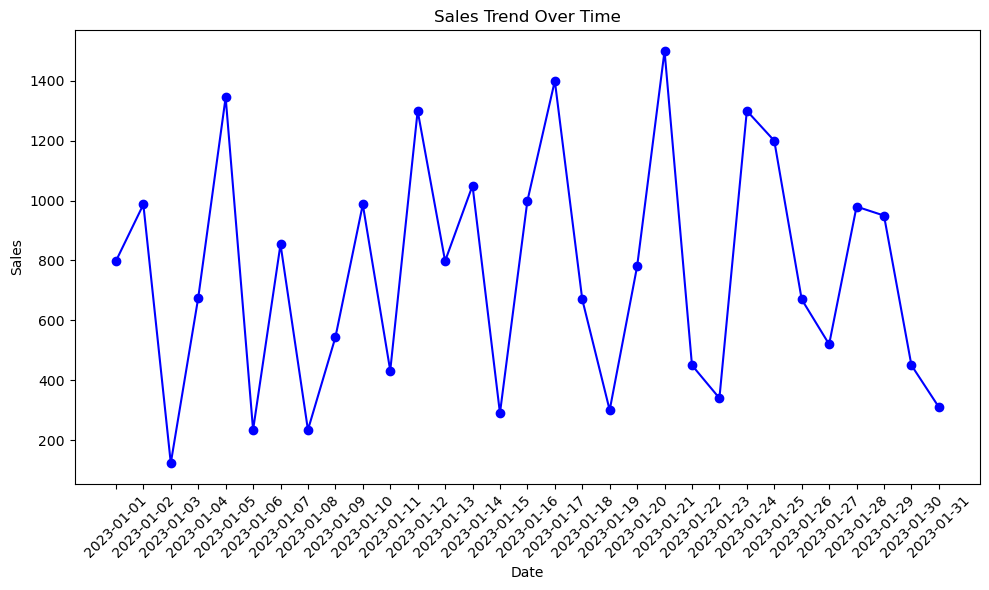

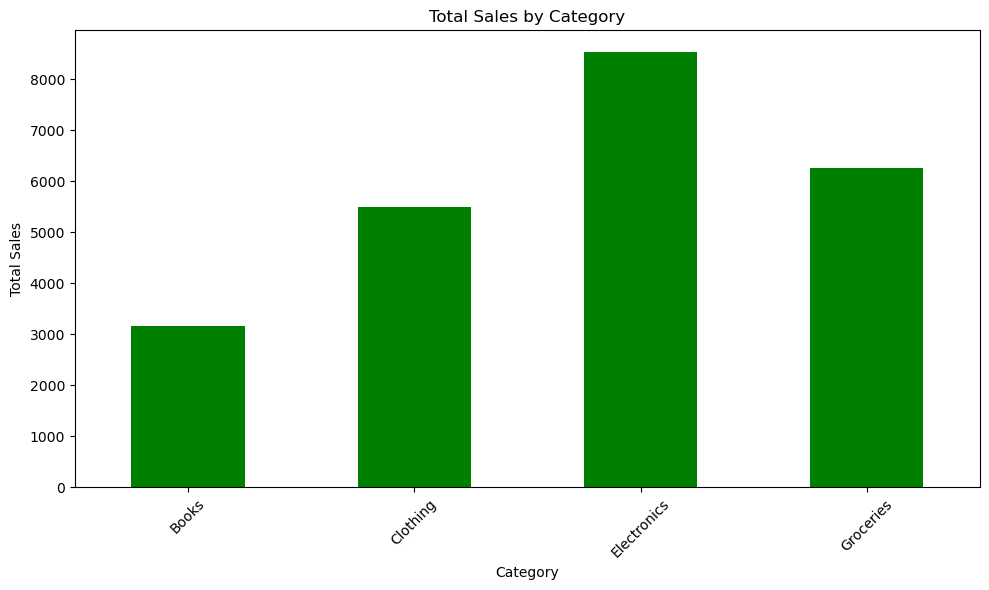

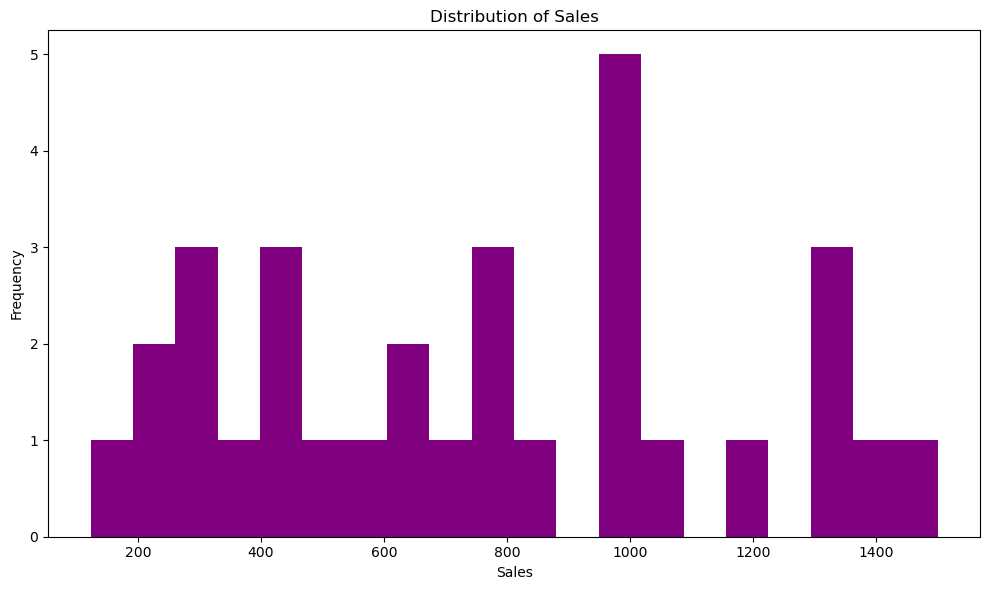

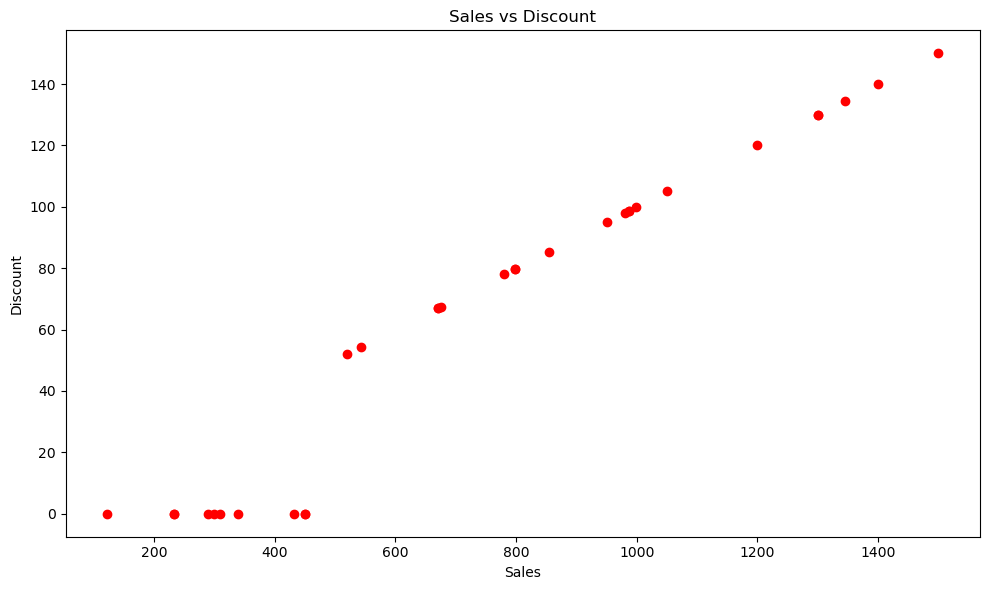

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

category_sales = data.groupby('Category')['Sales'].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['Sales'], bins=20, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['Discount'], color='red')
plt.title('Sales vs Discount')
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.tight_layout()
plt.show()
